In [37]:
import pandas as pd
import numpy as np

In [38]:
credit_without_outlier = pd.read_csv('After_Outlier_Scaling.csv')
credit_without_outlier = credit_without_outlier.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
credit_without_outlier

,activity_year,lei,derived_msa-md,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,...,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,county code,county name,median_housing_price,year,covid_year,ratio
0,2018.0,TR24TWEY5RVRQV65HD49,35614.0,36081.0,3.608106e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,...,-0.349833,-1.408698,-1.417558,1.213856,36081.0,Queens,0.931181,2018.0,0.0,-1.189306
1,2018.0,TR24TWEY5RVRQV65HD49,35614.0,36081.0,3.608108e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,...,-0.618709,-0.749130,-0.686969,1.147630,36081.0,Queens,0.931181,2018.0,0.0,-1.869257
2,2018.0,TR24TWEY5RVRQV65HD49,35614.0,36081.0,3.608111e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,...,0.389575,-0.165793,-0.320337,0.419148,36081.0,Queens,0.931181,2018.0,0.0,-0.141505
3,2018.0,TR24TWEY5RVRQV65HD49,35614.0,36085.0,3.608503e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,...,-0.080958,1.408554,1.511486,-0.839140,36085.0,Richmond,0.824365,2018.0,0.0,0.610376
4,2018.0,TR24TWEY5RVRQV65HD49,35614.0,36047.0,3.604705e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,...,-1.111648,-1.489902,-1.388120,0.021794,36047.0,Kings,0.957885,2018.0,0.0,-0.909507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435441,2020.0,549300VZVN841I2ILS84,99999.0,36031.0,3.603196e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,...,-0.058551,-0.783931,0.047633,0.286697,36031.0,Essex,-0.884684,2020.0,1.0,0.747230
435442,2020.0,549300VZVN841I2ILS84,35614.0,36081.0,3.608103e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,White,...,-0.887585,-1.428585,-1.788204,0.816502,36081.0,Queens,1.168846,2020.0,1.0,0.476063
435443,2020.0,549300VZVN841I2ILS84,35614.0,36087.0,3.608701e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,...,1.263421,0.742357,0.097142,-0.706689,36087.0,Rockland,0.530622,2020.0,1.0,0.520753
435444,2020.0,549300VZVN841I2ILS84,35614.0,36047.0,3.604709e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Black or African American,...,-0.797960,-1.420299,-1.218185,1.412533,36047.0,Kings,1.240946,2020.0,1.0,0.505644


In [39]:
df_cate = credit_without_outlier[['activity_year','conforming_loan_limit','derived_loan_product_type',
              'derived_dwelling_category','derived_ethnicity','derived_race',
              'derived_sex','purchaser_type','preapproval','loan_type','loan_purpose',
              'lien_status','reverse_mortgage','open-end_line_of_credit','business_or_commercial_purpose',
              'hoepa_status','negative_amortization','interest_only_payment','balloon_payment',
              'other_nonamortizing_features','construction_method','occupancy_type',
              'manufactured_home_secured_property_type','manufactured_home_land_property_interest',
              'total_units','debt_to_income_ratio','applicant_credit_score_type',
              'co-applicant_credit_score_type','applicant_ethnicity-1','co-applicant_ethnicity-1',
              'applicant_ethnicity_observed','co-applicant_ethnicity_observed','applicant_race-1',
              'co-applicant_race-1','applicant_race_observed','co-applicant_race_observed',
              'applicant_sex','co-applicant_sex','applicant_sex_observed','co-applicant_sex_observed',
              'applicant_age','co-applicant_age',
              'initially_payable_to_institution','aus-1','denial_reason-1','covid_year']]
#categorical data

In [40]:
for i in df_cate.columns:
    try:
        df_cate[i] = df_cate[i].apply(lambda x: str(x))
    except:
        df_cate[i] = df_cate[i]
#categorical data transformed to string

/var/folders/qx/k05b35rd7jqfpm9_5pm2rt_w0000gn/T/ipykernel_55988/3992983749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cate[i] = df_cate[i].apply(lambda x: str(x))


In [41]:
df_dummies = pd.get_dummies(df_cate)#categorical to dummies

In [42]:
df_dummies['action_taken'] = credit_without_outlier['action_taken'] 

In [43]:
df_dummies_x = df_dummies.drop(['action_taken'], axis=1)

In [44]:
dummyval_corr = df_dummies.corr()

In [45]:
df_num = credit_without_outlier[['loan_amount',
 'loan_term',
 'property_value',
 'income',
 'tract_population',
 'tract_minority_population_percent',
 'ffiec_msa_md_median_family_income',
 'tract_to_msa_income_percentage',
 'tract_owner_occupied_units',
 'tract_one_to_four_family_homes',
 'tract_median_age_of_housing_units',
 'median_housing_price',
 'ratio','action_taken']]
df_num_x = credit_without_outlier[['loan_amount',
 'loan_term',
 'property_value',
 'income',
 'tract_population',
 'tract_minority_population_percent',
 'ffiec_msa_md_median_family_income',
 'tract_to_msa_income_percentage',
 'tract_owner_occupied_units',
 'tract_one_to_four_family_homes',
 'tract_median_age_of_housing_units',
 'median_housing_price',
 'ratio']]


## 1. correlation approach
（1）选出15-20个feature，run一下random forest/logistic regression


In [46]:
numerical_corr = df_num.corr()


pos_d = dummyval_corr.loc[dummyval_corr['action_taken']>0.52].index[:-1]
neg_d = dummyval_corr.loc[dummyval_corr['action_taken']<-0.52].index
total_d = neg_d.tolist()+ pos_d.tolist()#selected dummy features
dummy_features = df_dummies[total_d].columns

neg_n = numerical_corr.loc[numerical_corr['action_taken']<-0.05].index
pos_n = numerical_corr.loc[numerical_corr['action_taken']>0.05].index[:-1]
total_n = neg_n.tolist()+ pos_n.tolist()#selected numerical features
numerical_features = df_num[total_n].columns
len(dummy_features)
len(numerical_features)

3

In [47]:
dummy_features

Index(['purchaser_type_0.0', 'hoepa_status_3.0',
       'initially_payable_to_institution_1.0', 'hoepa_status_2.0',
       'debt_to_income_ratio_-1', 'applicant_credit_score_type_9.0',
       'co-applicant_credit_score_type_9.0', 'applicant_ethnicity-1_4.0',
       'co-applicant_ethnicity-1_4.0', 'applicant_ethnicity_observed_3.0',
       'applicant_race-1_7.0', 'co-applicant_race-1_7.0', 'applicant_sex_4.0',
       'co-applicant_sex_4.0', 'applicant_age_8888', 'co-applicant_age_8888',
       'initially_payable_to_institution_3.0'],
      dtype='object')

In [48]:
df_dummies_x = df_dummies_x[dummy_features]
df_num_x = df_num_x[numerical_features]

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_num_x)

StandardScaler()

In [49]:
array_cate = np.asarray(df_dummies_x)
array_cate.shape

(435446, 17)

In [50]:
scaled_data_num = scaler.transform(df_num_x)
scaled_data = np.concatenate((scaled_data_num, array_cate),axis = 1) 

In [51]:
features = df_num_x.columns.tolist()+df_dummies_x.columns.tolist()

In [52]:
scaled_data.shape

(435446, 20)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = np.asarray(credit_without_outlier['action_taken'])
X = scaled_data

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
base_rfc1 = RandomForestClassifier(random_state=0, n_estimators=100, n_jobs=-1)
base_rfc1.fit(X, y)

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
base_ps_scores = cross_val_score(base_rfc1, X, y, cv=3)
print("Cross-validated scores:", base_ps_scores)

Cross-validated scores: [0.88462201 0.86281683 0.87620222]


### Random Forest after corr selection

In [55]:
from sklearn import tree
from matplotlib import pyplot as plt

In [56]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
max_depth = [int(x) for x in np.linspace(1, 60, num = 11)]
max_depth.append(None)
#n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 20)]
param_grid = {
    'max_depth': max_depth,
  #  'n_estimators': n_estimators
}
# Create a based model
rfc1 = RandomForestClassifier()
# Instantiate the grid search model
grid_search1 = GridSearchCV(estimator = rfc1, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search1.fit(X, y)
grid_search1.best_params_


Fitting 3 folds for each of 12 candidates, totalling 36 fits


{'max_depth': 6}

In [57]:
best_grid_rfc1 = grid_search1.best_estimator_
grid_ps_scores = cross_val_score(best_grid_rfc1, X, y, cv=3)
print ("Cross-validated scores after tuning hyperparameter:", grid_ps_scores)

Cross-validated scores after tuning hyperparameter: [0.91176653 0.88179733 0.93470113]


In [58]:
base_ps_scores = np.mean(base_ps_scores)
base_ps_scores
print('Improvement of {:0.2f}%.'.format( 100 * (np.mean(grid_ps_scores) - 0.8753691625069774) / 0.8753691625069774))

Improvement of 3.89%.


In [59]:
np.mean(grid_ps_scores)

0.9094216625700318

[CV] END ........................................max_depth=1; total time=   9.0s
[CV] END ........................................max_depth=6; total time=  25.4s
[CV] END .......................................max_depth=12; total time=  37.4s
[CV] END .......................................max_depth=24; total time= 1.0min
[CV] END .......................................max_depth=30; total time= 1.1min
[CV] END .......................................max_depth=36; total time= 1.0min
[CV] END .......................................max_depth=48; total time= 1.2min
[CV] END .......................................max_depth=54; total time= 1.2min
[CV] END .......................................max_depth=60; total time= 1.2min
[CV] END ........................................max_depth=1; total time=   9.3s
[CV] END ........................................max_depth=6; total time=  25.7s
[CV] END .......................................max_depth=18; total time=  50.5s
[CV] END ...................

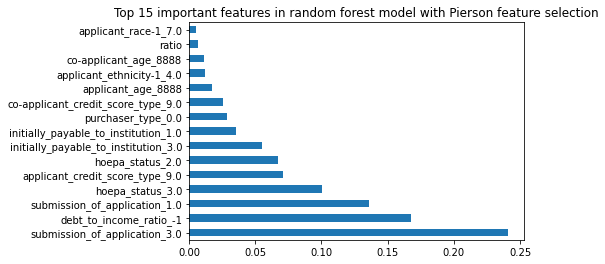

In [32]:
feat_importances = pd.Series(best_grid_rfc1.feature_importances_, index=features)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features in random forest model with Pierson feature selection")
plt.show()

# 王子殿下帮我跑到这里就可以 感恩

In [31]:
grid_search1.cv_results_

{'mean_fit_time': array([  4.29088434,   8.63975509,  12.58049965,  17.75433715,
         25.86671368,  32.32036543,  36.57918   ,  36.36569452,
         39.41008369,  43.469788  ,  64.09765267,  65.61262194,
         61.32558854,  62.15747635,  66.45668125,  72.90688411,
         90.49432309,  90.76669939,  89.83966645,  92.71579003,
          9.44498165,  19.09358915,  32.16868194,  46.62100228,
         53.43640478,  61.52294056,  74.38363457,  91.02396766,
        112.58281525, 119.06826901, 135.87506557, 135.41378848,
        154.44048397, 158.7051963 , 153.57809838, 168.60105332,
        192.95162662, 203.84101439, 196.04866322, 223.06514883,
         17.15887332,  37.27738531,  56.04001101,  75.54217005,
         96.9569873 , 113.51480293, 132.61735209, 140.10122808,
        144.37707575, 148.6080126 , 157.5957013 , 167.82336497,
        184.63648232, 205.31043069, 224.23680814, 229.69173622,
        241.74332436, 267.02046728, 284.76750064, 292.7974263 ,
         18.89963269,  

In [36]:
features

['loan_amount',
 'loan_term',
 'ratio',
 'purchaser_type_0.0',
 'hoepa_status_3.0',
 'submission_of_application_1.0',
 'initially_payable_to_institution_1.0',
 'hoepa_status_2.0',
 'debt_to_income_ratio_-1',
 'applicant_credit_score_type_9.0',
 'co-applicant_credit_score_type_9.0',
 'applicant_ethnicity-1_4.0',
 'co-applicant_ethnicity-1_4.0',
 'applicant_ethnicity_observed_3.0',
 'applicant_race-1_7.0',
 'co-applicant_race-1_7.0',
 'applicant_sex_4.0',
 'co-applicant_sex_4.0',
 'applicant_age_8888',
 'co-applicant_age_8888',
 'submission_of_application_3.0',
 'initially_payable_to_institution_3.0']

In [300]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
interaction = poly.fit_transform(X_train)
interaction.shape

(304812, 276)

In [303]:
y.shape

(435446,)

In [301]:
pca = PCA(n_components = 10)
pca_m = pca.fit(interaction)
interaction_pca = pca.transform(interaction)
interaction_pca.shape

(304812, 10)

In [304]:
max_depth = [int(x) for x in np.linspace(1, 60, num = 11)]
max_depth.append(None)
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 11)]
param_grid = {
    'max_depth': max_depth,
    'n_estimators': n_estimators
}

# Create a based model
rfc3 = RandomForestClassifier()
# Instantiate the grid search model
grid_search3 = GridSearchCV(estimator = rfc3, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search3.fit(interaction_pca, y_train)
grid_search3.best_params_

Fitting 3 folds for each of 132 candidates, totalling 396 fits


/Users/amyliu/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [305]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca_m = pca.fit(interaction)
x_pca = pca.transform(interaction)

x_pca.shape
rfc2 = RandomForestClassifier(random_state=0, n_estimators=100, n_jobs=-1)
rfc2.fit(X, y)
scaled_data.shape

ValueError: Found input variables with inconsistent numbers of samples: [304812, 435446]

In [ ]:
pca = PCA(n_components = 10)
pca_m = pca.fit(interaction)
x_pca = pca.transform(interaction)

x_pca.shape

scaled_data.shapev

In [255]:
df_grid_results_1 = pd.DataFrame(grid_search1.cv_results_)[["param_max_depth",'param_n_estimators',"mean_test_score"]].sort_values('mean_test_score')
#plt.contour()
X,Y,Z = df_grid_results_1['param_max_depth'],df_grid_results_1['param_n_estimators'],df_grid_results_1['mean_test_score']
#cp1 = plt.contour(X,Y,Z)#levels=[0,0.25,0.5,0.75,1], extend='both')
Z_standardized = (Z-np.min(Z))/(np.max(Z)-np.min(Z))
Z_standardized




<ipython-input-255-92883d31e367>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = 0


226     0
232     0
236     0
185    54
218    60
       ..
78     18
50     12
58     12
55     12
59     12
Name: param_max_depth, Length: 240, dtype: object

In [262]:
type(X)

pandas.core.series.Series

In [257]:
Z

226    0.881540
232    0.881619
236    0.881655
185    0.881655
218    0.881707
         ...   
78     0.911450
50     0.911516
58     0.911539
55     0.911559
59     0.911565
Name: mean_test_score, Length: 240, dtype: float64

In [143]:
y_pred1 = best_grid_rfc1.predict(X_test)
y_pred1

array([0., 0., 1., ..., 0., 0., 0.])

In [145]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

In [146]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [147]:
scores = cross_val_score(rfc1, X, y, cv=6)
print ("Cross-validated scores:", scores)

Cross-validated scores: [0.87213228 0.89705822 0.87484499 0.84039739 0.87563039 0.89027751]


In [148]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
logistic1 = lr.fit(X,y)
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
scores1 = cross_val_score(logistic1, X, y, cv=6)
print ("Cross-validated scores:", scores1)

/Users/amyliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/amyliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Cross-validated scores: [0.89631416 0.92664141 0.9067159  0.85631218 0.92912062 0.93822857]


/Users/amyliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Lasso Selection

In [149]:
df_numerical = credit_without_outlier[['loan_amount',
 'loan_term',
 'property_value',
 'income',
 'tract_population',
 'tract_minority_population_percent',
 'ffiec_msa_md_median_family_income',
 'tract_to_msa_income_percentage',
 'tract_owner_occupied_units',
 'tract_one_to_four_family_homes',
 'tract_median_age_of_housing_units',
 'median_housing_price',
 'ratio']]
df_dummy = pd.get_dummies(df_cate)
df_dummy_final = np.asarray(df_dummy)

In [150]:
feature_dummy = np.asarray(df_dummy.columns)
feature_dummy

array(['activity_year_2018.0', 'activity_year_2019.0',
       'activity_year_2020.0', 'conforming_loan_limit_C',
       'conforming_loan_limit_NC',
       'derived_loan_product_type_Conventional:First Lien',
       'derived_loan_product_type_Conventional:Subordinate Lien',
       'derived_loan_product_type_FHA:First Lien',
       'derived_loan_product_type_FHA:Subordinate Lien',
       'derived_loan_product_type_FSA/RHS:First Lien',
       'derived_loan_product_type_VA:First Lien',
       'derived_dwelling_category_Single Family (1-4 Units):Manufactured',
       'derived_dwelling_category_Single Family (1-4 Units):Site-Built',
       'derived_ethnicity_Ethnicity Not Available',
       'derived_ethnicity_Hispanic or Latino', 'derived_ethnicity_Joint',
       'derived_ethnicity_Not Hispanic or Latino',
       'derived_race_2 or more minority races',
       'derived_race_American Indian or Alaska Native',
       'derived_race_Asian', 'derived_race_Black or African American',
       'deriv

In [151]:
y = np.asarray(credit_without_outlier['action_taken'])

In [152]:
X = np.concatenate((df_numerical, df_dummy_final),axis = 1) 

In [153]:
X 

array([[ 0.1640663 ,  0.51184495,  0.02307466, ...,  0.        ,
         1.        ,  0.        ],
       [-0.5094778 ,  0.51184495,  0.02307466, ...,  0.        ,
         1.        ,  0.        ],
       [-0.17270575,  0.51184495,  0.16693801, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.02935748,  0.51184495, -0.0297731 , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.5785089 ,  0.51184495,  0.1463861 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.20638295,  0.51184495, -0.10904474, ...,  0.        ,
         0.        ,  1.        ]])

In [155]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    penalty='l1',
    solver='saga')
logistic = model.fit(X, y)

/Users/amyliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [156]:
coef = logistic.coef_

In [157]:
numerical_original = ['loan_amount',
 'loan_term',
 'property_value',
 'income',
 'tract_population',
 'tract_minority_population_percent',
 'ffiec_msa_md_median_family_income',
 'tract_to_msa_income_percentage',
 'tract_owner_occupied_units',
 'tract_one_to_four_family_homes',
 'tract_median_age_of_housing_units',
 'median_housing_price',
 'ratio']

In [158]:
feature_numerical = np.asarray(numerical_original)


In [159]:
feature_dummy.shape

(250,)

In [160]:
variables_array = np.append(feature_numerical,feature_dummy)

In [161]:
variables_array.shape

(263,)

In [162]:
coef_1 = np.transpose(np.abs(coef))

In [163]:
coef1 = coef_1.reshape(-1)

In [164]:

coef1.shape

(263,)

In [165]:
total_feature = pd.DataFrame(coef1,variables_array)

In [166]:
total_feature.columns = list('n')
total_feature.columns

Index(['n'], dtype='object')

In [167]:
choose = total_feature[total_feature['n']>0.1]

In [168]:
choose = choose.sort_values(by="n",ascending=False)

In [169]:
choose

,n
debt_to_income_ratio_>60%,1.676478
submission_of_application_3.0,1.600411
purchaser_type_0.0,0.987897
hoepa_status_2.0,0.973447
hoepa_status_3.0,0.938760
...,...
debt_to_income_ratio_36,0.113424
co-applicant_age_45-54,0.112109
conforming_loan_limit_NC,0.111107
derived_ethnicity_Not Hispanic or Latino,0.108362


In [170]:
choose1 = np.asarray(choose)

In [171]:
choose2 = choose.reset_index()

In [172]:
features_choose = choose2['index']

In [173]:
features_choose = np.asarray(features_choose)
features_choose = list(features_choose)
features_choose

['debt_to_income_ratio_>60%',
 'submission_of_application_3.0',
 'purchaser_type_0.0',
 'hoepa_status_2.0',
 'hoepa_status_3.0',
 'submission_of_application_1.0',
 'debt_to_income_ratio_50%-60%',
 'debt_to_income_ratio_-1',
 'aus-1_5.0',
 'submission_of_application_2.0',
 'aus-1_2.0',
 'co-applicant_credit_score_type_10.0',
 'purchaser_type_3.0',
 'loan_purpose_1.0',
 'co-applicant_age_8888',
 'initially_payable_to_institution_3.0',
 'purchaser_type_1.0',
 'debt_to_income_ratio_20%-<30%',
 'aus-1_1.0',
 'business_or_commercial_purpose_2.0',
 'debt_to_income_ratio_30%-<36%',
 'loan_purpose_2.0',
 'loan_purpose_4.0',
 'initially_payable_to_institution_1.0',
 'business_or_commercial_purpose_1.0',
 'preapproval_1.0',
 'co-applicant_race-1_7.0',
 'co-applicant_ethnicity-1_4.0',
 'co-applicant_sex_4.0',
 'open-end_line_of_credit_2.0',
 'applicant_credit_score_type_8.0',
 'preapproval_2.0',
 'other_nonamortizing_features_2.0',
 'open-end_line_of_credit_1.0',
 'balloon_payment_2.0',
 'loan_pur

In [174]:
df_dummy.shape

(435446, 250)

In [175]:
df_numerical = credit_without_outlier[['loan_amount',
 'loan_term',
 'property_value',
 'income',
 'tract_population',
 'tract_minority_population_percent',
 'ffiec_msa_md_median_family_income',
 'tract_to_msa_income_percentage',
 'tract_owner_occupied_units',
 'tract_one_to_four_family_homes',
 'tract_median_age_of_housing_units',
 'median_housing_price',
 'ratio']]

In [176]:
df_total = pd.concat([df_numerical,df_dummy],axis=1)

In [177]:
df_total.shape

(435446, 263)

In [178]:
dummy_final_df = df_total[features_choose]

In [179]:
X1 = np.asarray(dummy_final_df)#Lasso_selection

## random forest methods

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
y1 = np.asarray(credit_without_outlier['action_taken'])
X1 = np.asarray(dummy_final_df)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)
rfc2 = RandomForestClassifier(random_state=0, n_estimators=100, n_jobs=-1)
rfc2.fit(X1_train, y1_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [181]:
y1_pred1 = rfc2.predict(X1_test)
y1_pred1

array([1., 1., 0., ..., 0., 1., 0.])

In [182]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

In [183]:
accuracy_score(y1_test, y1_pred1)
print(f"The accuracy of the model is {round(accuracy_score(y1_test,y1_pred1),3)*100} %")

The accuracy of the model is 89.4 %


In [184]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [185]:
scores2 = cross_val_score(rfc2, X1, y1, cv=6)
print ("Cross-validated scores:", scores2)

/Users/amyliu/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/amyliu/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/amyliu/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/amyliu/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too sho

Cross-validated scores: [0.88819842 0.90575267 0.89485215 0.85217847 0.88362223 0.88969879]


In [187]:
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
param_grid = {
    'max_depth': max_depth,
    'n_estimators': n_estimators
}

rfc2 = RandomForestClassifier()
# Instantiate the grid search model
grid_search2 = GridSearchCV(estimator = rfc1, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search2.fit(X1_train,y1_train)
grid_search2.best_params_

Fitting 3 folds for each of 120 candidates, totalling 360 fits


/Users/amyliu/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'max_depth': 19, 'n_estimators': 450}

In [190]:
best_grid_rfc2 = grid_search2.best_estimator_
grid_accuracy2 = best_grid_rfc2.score(X1_test, y1_test)

In [ ]:
# print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy2 - base_accuracy) / base_accuracy))

In [191]:
grid_accuracy2

0.9143944149302632

In [192]:
best_grid_rfc2.feature_importances_

array([0.01792469, 0.17516212, 0.04813907, 0.07079546, 0.09726428,
       0.08731832, 0.00658435, 0.12974734, 0.00384959, 0.00590498,
       0.00538443, 0.02036979, 0.00698217, 0.0055868 , 0.02372081,
       0.05986585, 0.00563194, 0.00180222, 0.00893428, 0.00088149,
       0.0014833 , 0.00255502, 0.00190097, 0.04578996, 0.00090676,
       0.00236915, 0.01852195, 0.01076199, 0.0145985 , 0.0139316 ,
       0.00424127, 0.00232654, 0.00043115, 0.01279966, 0.00034639,
       0.00319489, 0.03548951, 0.00045121, 0.00090802, 0.02023981,
       0.00157187, 0.00038369, 0.00205584, 0.000592  , 0.00116837,
       0.0010202 , 0.00052185, 0.00157481, 0.00071079, 0.00051272,
       0.00050988, 0.00169392, 0.00137195, 0.000461  , 0.00103221,
       0.00044147, 0.00264203, 0.00038858, 0.0013164 , 0.00071445,
       0.00305622, 0.00116215])

In [274]:
feat_importances = pd.Series(best_grid_rfc2.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [268]:
best_grid_rfc2.feature_names_in_

AttributeError: 'RandomForestClassifier' object has no attribute 'feature_names_in_'

## random forest methods

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
y = np.asarray(credit_without_outlier['action_taken'])
X = x_pca
y.shape

(435446,)

In [45]:
X.shape

(435446, 10)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rfc3 = RandomForestClassifier(random_state=0, n_estimators=100, n_jobs=-1)
rfc3.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [47]:
y_pred3 = rfc3.predict(X_test)
y_pred3

array([0., 0., 0., ..., 0., 0., 0.])

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

In [49]:
accuracy_score(y_test, y_pred3)
print(f"The accuracy of the model is {round(accuracy_score(y_test,y_pred3),3)*100} %")

The accuracy of the model is 88.2 %


## logistic regression methods

In [50]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [51]:
scores = cross_val_score(rfc3, X, y, cv=6)
print ("Cross-validated scores:", scores)

/Users/amyliu/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/amyliu/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/amyliu/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/amyliu/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too sho

Cross-validated scores: [0.87359283 0.8982432  0.87702207 0.83878524 0.87718742 0.8846281 ]


## 2. logistic regression with L1 regularization feature selection

In [52]:
df_numerical = credit_without_outlier[['loan_amount',
 'loan_term',
 'property_value',
 'income',
 'tract_population',
 'tract_minority_population_percent',
 'ffiec_msa_md_median_family_income',
 'tract_to_msa_income_percentage',
 'tract_owner_occupied_units',
 'tract_one_to_four_family_homes',
 'tract_median_age_of_housing_units',
 'median_housing_price',
 'ratio']]
df_dummy = pd.get_dummies(df_cate)
df_dummy_final = np.asarray(df_dummy)

In [53]:
feature_dummy = np.asarray(df_dummy.columns)
feature_dummy

array(['activity_year_2018.0', 'activity_year_2019.0',
       'activity_year_2020.0', 'conforming_loan_limit_C',
       'conforming_loan_limit_NC',
       'derived_loan_product_type_Conventional:First Lien',
       'derived_loan_product_type_Conventional:Subordinate Lien',
       'derived_loan_product_type_FHA:First Lien',
       'derived_loan_product_type_FHA:Subordinate Lien',
       'derived_loan_product_type_FSA/RHS:First Lien',
       'derived_loan_product_type_VA:First Lien',
       'derived_dwelling_category_Single Family (1-4 Units):Manufactured',
       'derived_dwelling_category_Single Family (1-4 Units):Site-Built',
       'derived_ethnicity_Ethnicity Not Available',
       'derived_ethnicity_Hispanic or Latino', 'derived_ethnicity_Joint',
       'derived_ethnicity_Not Hispanic or Latino',
       'derived_race_2 or more minority races',
       'derived_race_American Indian or Alaska Native',
       'derived_race_Asian', 'derived_race_Black or African American',
       'deriv

In [54]:
y = np.asarray(credit_without_outlier['action_taken'])

In [55]:
X = np.concatenate((df_numerical, df_dummy_final),axis = 1) 

In [56]:
X 

array([[ 0.1640663 ,  0.51184495,  0.02307466, ...,  0.        ,
         1.        ,  0.        ],
       [-0.5094778 ,  0.51184495,  0.02307466, ...,  0.        ,
         1.        ,  0.        ],
       [-0.17270575,  0.51184495,  0.16693801, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.02935748,  0.51184495, -0.0297731 , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.5785089 ,  0.51184495,  0.1463861 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.20638295,  0.51184495, -0.10904474, ...,  0.        ,
         0.        ,  1.        ]])

In [57]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    penalty='l1',
    solver='saga')


logistic = model.fit(X, y)

/Users/amyliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [58]:
coef = logistic.coef_

In [59]:
numerical_original = ['loan_amount',
 'loan_term',
 'property_value',
 'income',
 'tract_population',
 'tract_minority_population_percent',
 'ffiec_msa_md_median_family_income',
 'tract_to_msa_income_percentage',
 'tract_owner_occupied_units',
 'tract_one_to_four_family_homes',
 'tract_median_age_of_housing_units',
 'median_housing_price',
 'ratio']


In [60]:
feature_numerical = np.asarray(numerical_original)


In [61]:
feature_dummy.shape

(250,)

In [62]:
variables_array = np.append(feature_numerical,feature_dummy)

In [63]:
variables_array.shape

(263,)

In [64]:
coef_1 = np.transpose(np.abs(coef))

In [65]:
coef1 = coef_1.reshape(-1)

In [66]:

coef1.shape

(263,)

In [67]:
total_feature = pd.DataFrame(coef1,variables_array)

In [68]:
total_feature.columns = list('n')
total_feature.columns

Index(['n'], dtype='object')

In [69]:
choose = total_feature[total_feature['n']>0.1]

In [70]:
choose = choose.sort_values(by="n",ascending=False)

In [71]:
choose

,n
debt_to_income_ratio_>60%,1.676539
submission_of_application_3.0,1.600514
purchaser_type_0.0,0.987150
hoepa_status_2.0,0.973571
hoepa_status_3.0,0.938888
...,...
debt_to_income_ratio_36,0.113357
co-applicant_age_45-54,0.111692
conforming_loan_limit_NC,0.110790
derived_ethnicity_Not Hispanic or Latino,0.108450


In [72]:
choose1 = np.asarray(choose)

In [73]:
choose2 = choose.reset_index()

In [74]:
features_choose = choose2['index']

In [75]:
features_choose = np.asarray(features_choose)
features_choose = list(features_choose)
features_choose

['debt_to_income_ratio_>60%',
 'submission_of_application_3.0',
 'purchaser_type_0.0',
 'hoepa_status_2.0',
 'hoepa_status_3.0',
 'submission_of_application_1.0',
 'debt_to_income_ratio_50%-60%',
 'debt_to_income_ratio_-1',
 'aus-1_5.0',
 'submission_of_application_2.0',
 'aus-1_2.0',
 'co-applicant_credit_score_type_10.0',
 'loan_purpose_1.0',
 'purchaser_type_3.0',
 'co-applicant_age_8888',
 'initially_payable_to_institution_3.0',
 'purchaser_type_1.0',
 'debt_to_income_ratio_20%-<30%',
 'aus-1_1.0',
 'business_or_commercial_purpose_2.0',
 'debt_to_income_ratio_30%-<36%',
 'loan_purpose_2.0',
 'loan_purpose_4.0',
 'initially_payable_to_institution_1.0',
 'business_or_commercial_purpose_1.0',
 'preapproval_1.0',
 'co-applicant_race-1_7.0',
 'co-applicant_ethnicity-1_4.0',
 'co-applicant_sex_4.0',
 'open-end_line_of_credit_2.0',
 'applicant_credit_score_type_8.0',
 'preapproval_2.0',
 'other_nonamortizing_features_2.0',
 'open-end_line_of_credit_1.0',
 'balloon_payment_2.0',
 'loan_pur

In [76]:
df_dummy.shape

(435446, 250)

In [77]:
df_numerical = credit_without_outlier[['loan_amount',
 'loan_term',
 'property_value',
 'income',
 'tract_population',
 'tract_minority_population_percent',
 'ffiec_msa_md_median_family_income',
 'tract_to_msa_income_percentage',
 'tract_owner_occupied_units',
 'tract_one_to_four_family_homes',
 'tract_median_age_of_housing_units',
 'median_housing_price',
 'ratio']]

In [78]:
df_total = pd.concat([df_numerical,df_dummy],axis=1)

In [79]:
df_total.shape

(435446, 263)

In [80]:
dummy_final_df = df_total[features_choose]

In [81]:
X1 = np.asarray(dummy_final_df)

## random forest methods

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
y1 = np.asarray(credit_without_outlier['action_taken'])
X1 = np.asarray(dummy_final_df)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)
rfc2 = RandomForestClassifier(random_state=0, n_estimators=100, n_jobs=-1)
rfc2.fit(X1_train, y1_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [83]:

y1_pred1 = rfc2.predict(X1_test)
y1_pred1

array([0., 1., 0., ..., 0., 0., 1.])

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

In [85]:
accuracy_score(y1_test, y1_pred1)
print(f"The accuracy of the model is {round(accuracy_score(y1_test,y1_pred1),3)*100} %")

The accuracy of the model is 89.3 %


In [86]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [87]:
scores2 = cross_val_score(rfc2, X1, y1, cv=6)
print ("Cross-validated scores:", scores2)

/Users/amyliu/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/amyliu/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/amyliu/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/amyliu/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too sho

Cross-validated scores: [0.88777127 0.90604203 0.89552732 0.85166864 0.8838427  0.88972635]


## logistic regression method

In [88]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
scores3 = cross_val_score(logistic, X, y, cv=6)
print ("Cross-validated scores:", scores3)

/Users/amyliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/amyliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


KeyboardInterrupt: 

## Here we show the feature importance in each pricipal components

In [ ]:
# 10 samples with 5 features
train_features = np.random.rand(10,5)

# number of components
n_pcs= pca_m.components_.shape[0]#10

# get the index of the most important feature on EACH component
most_important = [np.abs(pca_m.components_[i]).argmax() for i in range(n_pcs)]



In [ ]:
n_pcs

In [ ]:
most_important

In [ ]:
initial_feature_names = df_num_x.columns.tolist()+ df_dummies_x.columns.tolist()

In [ ]:

most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): (most_important_names[i],pca_m.explained_variance_ratio_[i]) for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [ ]:
df

B. We put the selected features with high correlations 

In [ ]:
numerical_corr = df_num.corr()

In [ ]:

pos_d = dummyval_corr.loc[dummyval_corr['action_taken']>0.15].index[:-1]
neg_d = dummyval_corr.loc[dummyval_corr['action_taken']<-0.15].index
total_d = neg_d.tolist()+ pos_d.tolist()#selected dummy features
dummy_features = df_dummies[total_d].columns

neg_n = numerical_corr.loc[numerical_corr['action_taken']<-0.03].index
pos_n = numerical_corr.loc[numerical_corr['action_taken']>0.03].index[:-1]
total_n = neg_n.tolist()+ pos_n.tolist()#selected numerical features
numerical_features = df_num[total_n].columns


In [ ]:
len(dummy_features)

In [ ]:
len(numerical_features)

In [ ]:
array_x = np.concatenate((np.asarray(df_dummies[total_d]),np.asarray(df_num[total_n])),axis = 1)
array_x.shape

In [ ]:
y = np.asarray(credit_without_outlier['action_taken'])
X = array_x
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rfc_selected = RandomForestClassifier(random_state=0, n_estimators=100, n_jobs=-1)
rfc_selected.fit(X_train, y_train)

y_pred = rfc_selected.predict(X_test)
y_pred

In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {round(accuracy_score(y_test,y_pred),3)*100} %")


In [ ]:

# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(rfc3, X, y, cv=3)
print ("Cross-validated scores:", scores)
#[0.9151217  0.88537985 0.89495549]

In [ ]:
pip install plotly==5.3.1

In [ ]:
import plotly.figure_factory as ff


In [ ]:
credit.columns

In [ ]:
df_value = credit[['county code','action_taken']]
df_value = df_value.groupby('county code').aggregate({'action_taken':'sum'})
df_value = df_value.reset_index()

In [ ]:
pip install plotly-geo

In [ ]:
dfNY = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
dfNY = dfNY[dfNY['STNAME'] == 'New York']

In [ ]:
values = df_value['action_taken'].tolist()
fips = df_value['county code'].tolist()

In [ ]:
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10


In [ ]:
!pip install shapely

In [ ]:
endpts = list(np.mgrid[min(values):max(values):4j])

colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
              "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['New York'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title=' by County',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True,
)
fig.layout.template = None
fig.show()

In [ ]:
credit['applicant_age'].value_counts()

In [ ]:
credit.shape

In [ ]:
credit.to_csv('1026.csv')

In [ ]:
credit['applicant_race-1'].value_counts().sort_values(ascending = True)
#['applicant_race-5','applicant_race-4','applicant_race-3','applicant_race-2','applicant_race-1']]

In [ ]:
credit['derived_race']

In [ ]:
data1['applicant_race-5','applicant_race-4','applicant_race-3','applicant_race-2','applicant_race-1']

In [ ]:






（2）再加上二维的interaction，run一下models

